<a href="https://colab.research.google.com/github/Swagat-modder/DA-DS-portfolio/blob/main/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Zomato_data.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
df.shape


(148, 7)

In [5]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [6]:
#split the rate column using lambda function
df['rate']=df['rate'].apply(lambda x:x.split('/')[0])
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


**From what type of restaurant do most of the customers order**

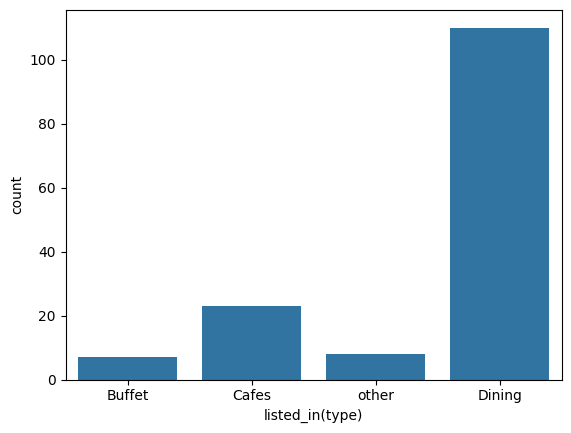

In [7]:
#ploting the listed_in(type) column
sns.countplot(x='listed_in(type)',data=df)
plt.show()

**How many votes have each type of restaurant recieved from customers**

In [8]:
#count votes which each type of restaurant received from customers
df.groupby('listed_in(type)')['votes'].sum()

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


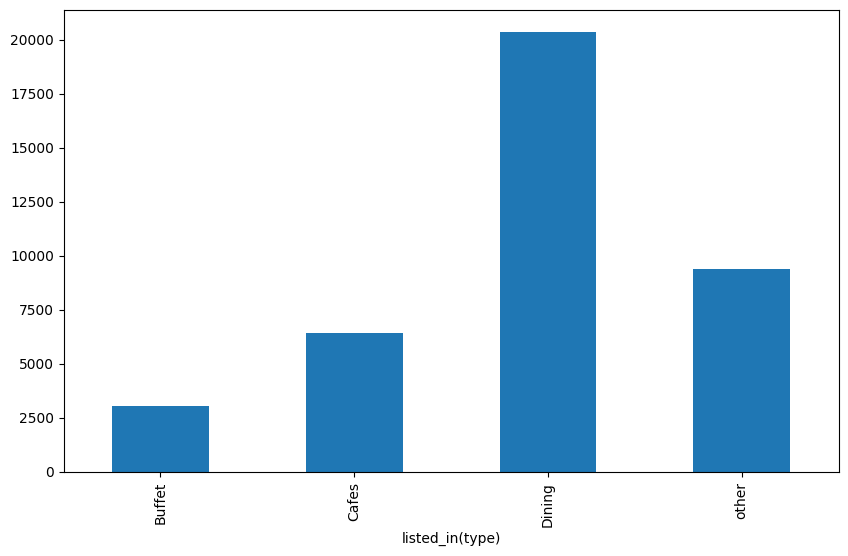

In [9]:

votes_by_type = df.groupby('listed_in(type)')['votes'].sum()

# Plotting the result
votes_by_type.plot(kind='bar', figsize=(10, 6))
plt.show()


**What are the rating does majority of the restaurants have recieved**

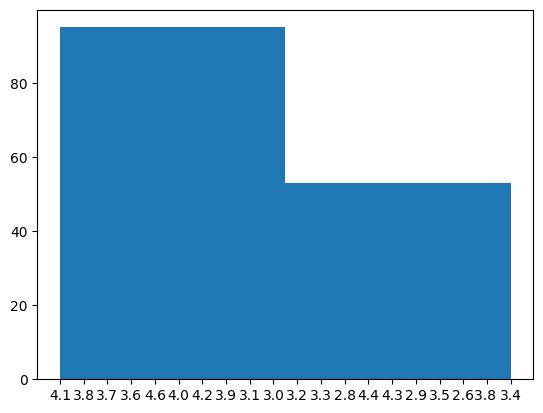

In [10]:
#ratings which majority of the restaurant have recieved
plt.hist(df['rate'],bins=2)
plt.show()

**Average spending on each order**

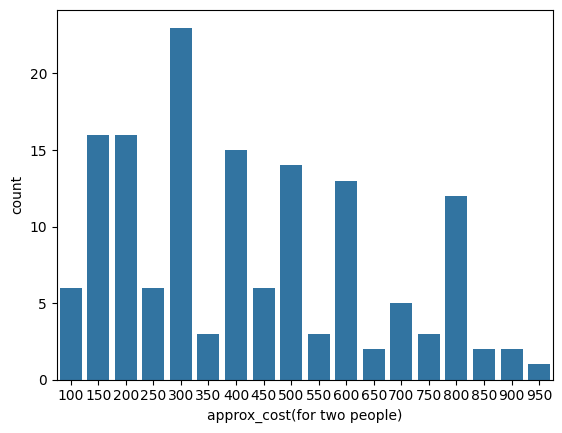

In [11]:
sns.countplot(x=df['approx_cost(for two people)'])
plt.show()

so couples prefer to spend mostly 300 rs in an order


**Which mode has recieved the maximum rating(online or offline)**

<Axes: xlabel='online_order', ylabel='rate'>

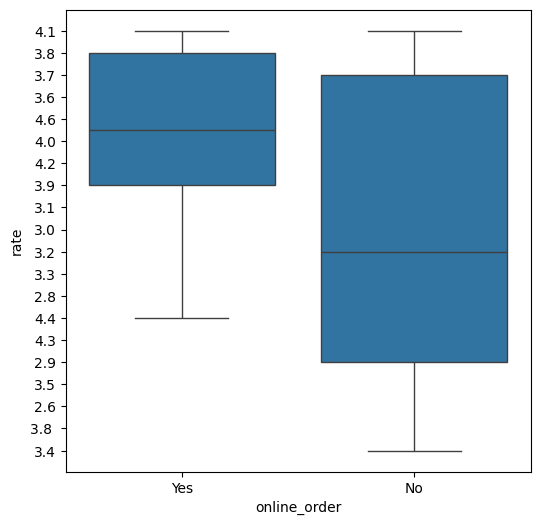

In [12]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)


So offline ordered customers give low rating compared to online rating

**Which type of restaurant recieved online and offline orders(comparision)**

In [13]:

pd.crosstab(df['listed_in(type)'],df['online_order'])



online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6
